## Discourse Over Time 
This notebook is a steb-by-step tutorial showing how the Tweetplomacy-23 discourse evolved over time. The notebook focuses on the reactions and sentiments of tweets.

## Target Audience

This tutorial is aimed at a basic level. You should have basic knowledge of Pandas and Python programming.

## Duration

About two hours.

## Environment Setup

Run the cells below:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as tick

%matplotlib inline 

## Read the Data

In [2]:
df = pd.read_pickle("joint_tweetplomacy_23_unique_tweets_with_freshest_retweet_metadata.pkl")

In [3]:
def plot_sentiments(df,  title):
    fig, ax = plt.subplots()
    df.plot(y=['sentimentNegative'], figsize=(15,6), color = 'crimson', ax = ax)
    df.plot(y=['sentimentPositive'], color = 'darkgreen', ax = ax)
    df.plot(y=['sentimentNeutral'],  color = 'mediumblue', ax = ax)
    df.plot(y=['sentimentCompound'], color = 'pink', ax = ax)

    ax.set_xlabel('', fontsize = 16)
    ax.set_ylabel('Sentiment', fontsize = 25)

    ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
    
    plt.xticks(fontsize=24, rotation=30, ha='center')
    plt.yticks(fontsize=24, ha='right')


    plt.axhline(0, color='black', linestyle='dashed')
    plt.gca().legend(loc='lower center', labels=['negative', 'positive', 'neutral', 'compound'], ncol = 4, fontsize=20, bbox_to_anchor=(0.5, -0.35))
    
    plt.savefig('./plots/'+title+'.pdf', bbox_inches = 'tight')
    plt.show()

In [4]:
def plot_reactions(df_tmp_count, df_tmp_sum, title, log=False):
    fig, ax = plt.subplots()
    df_tmp_count['tweets']= df_tmp_count['tweetId']
    df_tmp_count.plot(y=['tweets'], figsize=(3.33, 2.5), color = 'tab:red', ax = ax, lw=2)
    df_tmp_sum.plot(y=['favorites'], color = 'tab:blue', ax = ax, lw=2)
    df_tmp_sum.plot(y=['replies'], color = 'tab:green', ax = ax, lw=2)
    df_tmp_sum.plot(y=['retweets'], color = 'tab:orange', ax = ax ,lw=2)

    ax.set_xlabel('Year', fontsize = 10)
    ax.set_ylabel('Reactions', fontsize = 10)
    
    
    plt.xticks(fontsize=10, ha='center')
    plt.yticks(fontsize=10, ha='right')
    ax.get_legend().remove()
    
    #plt.gca().legend(loc=2, ncol = 1, fontsize=8)
    # using format string '{:.0f}' here but you can choose others
    if log:
        ax.set_yscale('log')
        # Show minor ticks
        ax.minorticks_on()
        ax.yaxis.set_minor_locator(tick.LogLocator(base=10.0, subs='auto', numticks=100))
        #plt.ticklabel_format(axis='y', scilimits=(0,0))
        plt.savefig('./plots/'+title+'_log.pdf', bbox_inches = 'tight')
    else:
            
        plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        plt.savefig('./plots/'+title+'.pdf', bbox_inches = 'tight')
    plt.show()

In [5]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

# === Create proxy handles for the legend ===
legend_elements = [
    Line2D([0], [0], color='tab:red', lw=2, label='tweets'),
    Line2D([0], [0], color='tab:blue', lw=2, label='favorites'),
    Line2D([0], [0], color='tab:green', lw=2, label='replies'),
    Line2D([0], [0], color='tab:orange', lw=2, label='retweets')
]

# === Create and save legend-only figure ===
fig_legend = plt.figure(figsize=(3.5, 0.5))  # adjust size as needed
ax_legend = fig_legend.add_subplot(111)
ax_legend.axis('off')  # hide axes

# Add the recreated legend
fig_legend.legend(
    handles=legend_elements,
    loc='center',
    fancybox=True,
    shadow=True,
    ncol=4,
    prop={'size': 12}  # Larger font
)

fig_legend.tight_layout()
fig_legend.savefig('./plots/legend_reactions.pdf', bbox_inches='tight')
plt.close(fig_legend)

In [6]:
def plot_sentiments_barchart(df,  title):
    
    fig, ax = plt.subplots(figsize=(3.33, 2.5))
    ax2 = ax.twinx()
    #ax.set_xticks(fontsize=24, rotation=45, ha='center')
    #ax2.set_xticks(fontsize=24, rotation=45, ha='center')
    #ax.set_yticks(fontsize=24, ha='right')
    #ax2.set_yticks(fontsize=24, ha='right')
    width=1

    ax.bar(df.index, df.sentimentNegative,  color = 'red', width=width) #alpha=0.4, width=1.0
    ax.bar(df.index, df.sentimentPositive, bottom=df.sentimentNegative, color = 'green', width=width)#, alpha=0.4, width=1.0
    ax.bar(df.index, df.sentimentNeutral,  bottom=df.sentimentPositive + df.sentimentNegative, color = 'blue', width=width)#, alpha=0.4, width=1.0
    ax2.plot(df.index, df.sentimentCompound,  color='pink', lw=2)

    #df.plot.bar(y=['sentimentNegative'], figsize=(15,6), color = 'red', ax = ax)
    #df.plot.bar(y=['sentimentPositive'], bottom= df['sentimentNegative'],  color = 'green', ax = ax)
    #df.plot.bar(y=['sentimentNeutral'], bottom= df['sentimentPositive']+df['sentimentNegative'], color = 'blue', ax = ax)
    #df.plot(y=['sentimentCompound'], figsize=(15,6), color = 'pink', ax = ax)
    #df.plot(y=['sentimentCompound'], ax = ax2, secondary_y = True)

    ax.set_xlabel('', fontsize = 16)
    ax.set_ylabel('Valence', fontsize = 10)
    ax2.set_ylabel('Compound', fontsize = 10)

   
    #plt.xticks(fontsize=24, rotation=45, ha='center')
    #plt.yticks(fontsize=24, ha='right')
    
    plt.axhline(0, color='black', linestyle='dashed')
    plt.gca().legend(loc='lower center', labels=['negative', 'positive', 'neutral', 'compound'], ncol = 2, fontsize=7, bbox_to_anchor=(0.5, -0.3))
    
    plt.savefig('./plots/'+title+'.pdf', bbox_inches = 'tight')
    plt.show()

# Weekly-based Analysis

## Overall discourse per topic

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


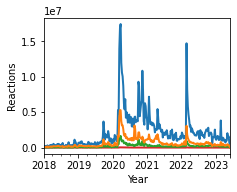

In [7]:
df_tmp=df
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, 'overall_reactions')

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


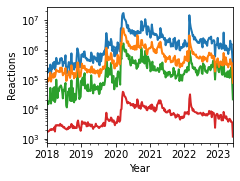

In [8]:
df_tmp=df
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, 'overall_reactions', log=True)

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


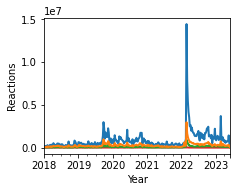

In [9]:
topic= 'topic_energy_security'
df_tmp=df[(df[topic])]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, topic+'overall_reactions')

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


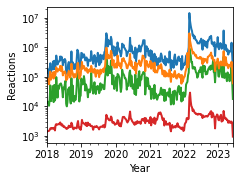

In [10]:
topic= 'topic_energy_security'
df_tmp=df[(df[topic])]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, topic+'overall_reactions', log=True)

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


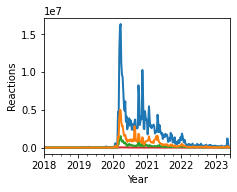

In [11]:
topic= 'topic_covid_19'
df_tmp=df[(df[topic])]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, topic+'overall_reactions')

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


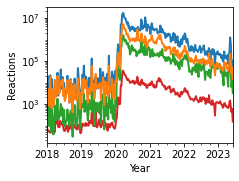

In [12]:
topic= 'topic_covid_19'
df_tmp=df[(df[topic])]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, topic+'overall_reactions', log=True)

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


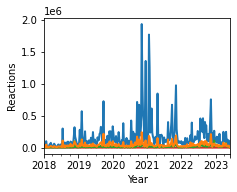

In [13]:
topic= 'topic_climate_change'
df_tmp=df[(df[topic])]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, topic+'overall_reactions')

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


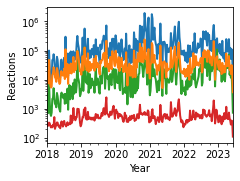

In [14]:
topic= 'topic_climate_change'
df_tmp=df[(df[topic])]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, topic+'overall_reactions', log=True)

## English discourse

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


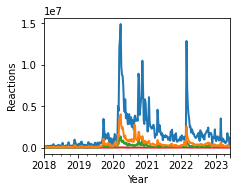

In [15]:
language = 'EN'
df_tmp=df[df['language']==language]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, language+'_reactions')

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


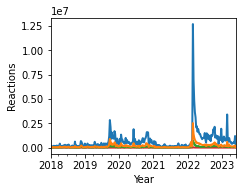

In [16]:
topic= 'topic_energy_security'
language = 'EN'
df_tmp=df[(df[topic]) & (df['language']==language) ]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, topic+'_'+language+'_reactions')

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


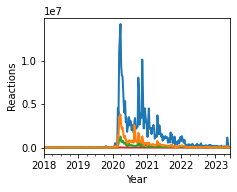

In [17]:
topic= 'topic_covid_19'
language = 'EN'
df_tmp=df[(df[topic]) & (df['language']==language) ]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, topic+'_'+language+'_reactions')

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


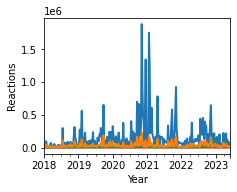

In [18]:
topic= 'topic_climate_change'
language = 'EN'
df_tmp=df[(df[topic]) & (df['language']==language) ]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, topic+'_'+language+'_reactions')

## German discourse

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


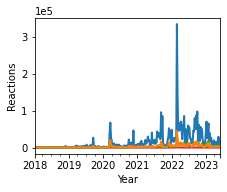

In [19]:
language = 'DE'
df_tmp=df[df['language']==language]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, language+'_reactions')

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


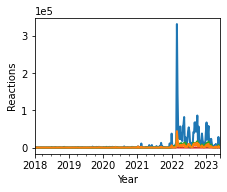

In [20]:
topic= 'topic_energy_security'
language = 'DE'
df_tmp=df[(df[topic]) & (df['language']==language) ]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, topic+'_'+language+'_reactions')

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


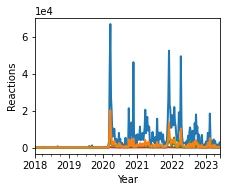

In [21]:
topic= 'topic_covid_19'
language = 'DE'
df_tmp=df[(df[topic]) & (df['language']==language) ]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, topic+'_'+language+'_reactions')

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


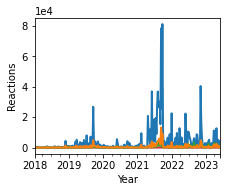

In [22]:
topic= 'topic_climate_change'
language = 'DE'
df_tmp=df[(df[topic]) & (df['language']==language) ]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, topic+'_'+language+'_reactions')

## French discourse

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


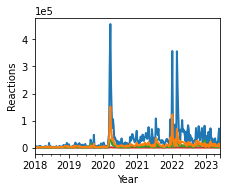

In [23]:
language = 'FR'
df_tmp=df[df['language']==language]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, language+'_reactions')

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


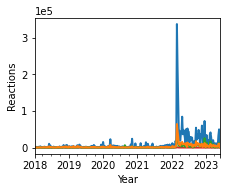

In [24]:
topic= 'topic_energy_security'
language = 'FR'
df_tmp=df[(df[topic]) & (df['language']==language) ]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, topic+'_'+language+'_reactions')

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


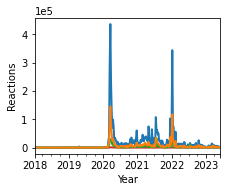

In [25]:
topic= 'topic_covid_19'
language = 'FR'
df_tmp=df[(df[topic]) & (df['language']==language) ]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, topic+'_'+language+'_reactions')

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


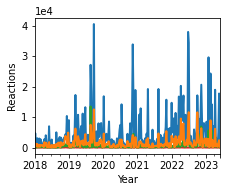

In [26]:
topic= 'topic_climate_change'
language = 'FR'
df_tmp=df[(df[topic]) & (df['language']==language) ]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, topic+'_'+language+'_reactions')

## Spanish discourse

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


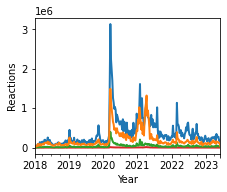

In [27]:
language = 'ES'
df_tmp=df[df['language']==language]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count, df_tmp_sum, language+'_reactions')

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


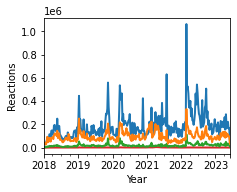

In [28]:
topic= 'topic_energy_security'
language = 'ES'
df_tmp=df[(df[topic]) & (df['language']==language) ]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, topic+'_'+language+'_reactions')

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


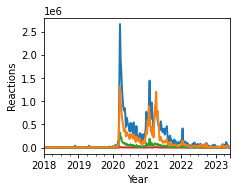

In [29]:
topic= 'topic_covid_19'
language = 'ES'
df_tmp=df[(df[topic]) & (df['language']==language) ]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, topic+'_'+language+'_reactions')

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


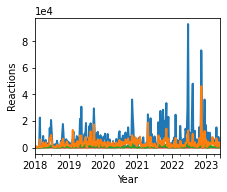

In [30]:
topic= 'topic_climate_change'
language = 'ES'
df_tmp=df[(df[topic]) & (df['language']==language) ]
g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
df_tmp_count  = g.count()
df_tmp_sum = g.sum()
plot_reactions(df_tmp_count,df_tmp_sum, topic+'_'+language+'_reactions')

In [31]:
def plot_reactions_for_topic_per_language(df, topic, reaction):

    df_tmp_de =df[((df['language']=='DE') & (df[topic]))]
    g= df_tmp_de.groupby(pd.Grouper(key='dt',freq='W'))
    df_tmp_de_sum = g.sum()

    df_tmp_en =df[((df['language']=='EN') & (df[topic]))]
    g= df_tmp_en.groupby(pd.Grouper(key='dt',freq='W'))
    df_tmp_en_sum = g.sum()

    df_tmp_fr =df[((df['language']=='FR') & (df[topic]))]
    g= df_tmp_fr.groupby(pd.Grouper(key='dt',freq='W'))
    df_tmp_fr_sum = g.sum()


    df_tmp_fr =df[((df['language']=='ES') & (df[topic]))]
    g= df_tmp_fr.groupby(pd.Grouper(key='dt',freq='W'))
    df_tmp_es_sum = g.sum()

    fig, ax = plt.subplots()
    df_tmp_de_sum.plot(y=[reaction], figsize=(3.33, 2.5), color = 'tab:red', ax = ax, lw=2)
    df_tmp_en_sum.plot(y=[reaction], color = 'tab:blue', ax = ax,lw=2)
    df_tmp_fr_sum.plot(y=[reaction],  color = 'tab:green', ax = ax,lw=2)
    df_tmp_es_sum.plot(y=[reaction],  color = 'tab:pink', ax = ax,lw=2)


    ax.set_xlabel('Year', fontsize = 10)

    plt.xticks(fontsize=10,  ha='center')
    plt.yticks(fontsize=10, ha='right')

    ax.set_ylabel(reaction, fontsize = 10)

    plt.gca().legend(loc='lower center', labels=['German', 'English', 'French', 'Spanish'], ncol = 4, fontsize=7, bbox_to_anchor=(0.4, -0.35))
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    plt.savefig('./plots/'+reaction+'_'+topic+'.pdf', bbox_inches = 'tight')

    plt.show()

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


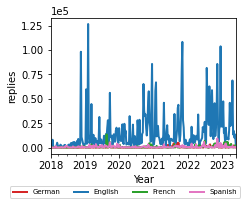

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


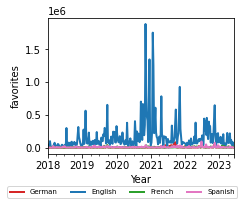

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


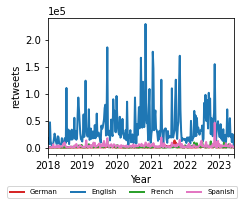

In [32]:
topic='topic_climate_change'
reaction = 'replies'
plot_reactions_for_topic_per_language(df, topic, reaction)
reaction = 'favorites'
plot_reactions_for_topic_per_language(df, topic, reaction)
reaction = 'retweets'
plot_reactions_for_topic_per_language(df, topic, reaction)

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


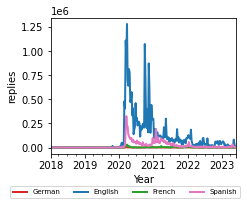

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


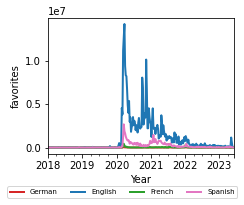

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


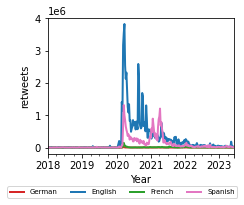

In [33]:
topic='topic_covid_19'
reaction = 'replies'
plot_reactions_for_topic_per_language(df, topic, reaction)
reaction = 'favorites'
plot_reactions_for_topic_per_language(df, topic, reaction)
reaction = 'retweets'
plot_reactions_for_topic_per_language(df, topic, reaction)

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


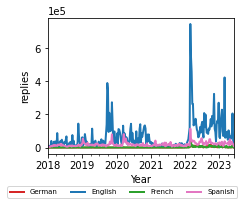

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


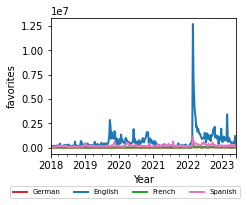

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


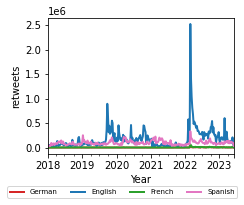

In [34]:
topic='topic_energy_security'
reaction = 'replies'
plot_reactions_for_topic_per_language(df, topic, reaction)
reaction = 'favorites'
plot_reactions_for_topic_per_language(df, topic, reaction)
reaction = 'retweets'
plot_reactions_for_topic_per_language(df, topic, reaction)

## Sentiments Over Time

In [35]:
def plot_sentiments_stacked_area(df, topic=None, language=None):
    
    if language:
        df_tmp = df[(df['language']==language)]
    else:
        language=''
    if topic:
        df_tmp = df[df[topic]]
        #print(df_tmp.head())
    else:
        topic=''
    if language and topic:
        df_tmp = df[(df['language']==language) & df[topic]]
    else:
        df_tmp = df
    

    #print(df_tmp.head())
    g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
    df_tmp_mean= g.mean()

    y = np.row_stack((df_tmp_mean.sentimentNegative,  df_tmp_mean.sentimentNeutral, df_tmp_mean.sentimentPositive,))
    x = df_tmp_mean.index

    # Make new array consisting of fractions of column-totals,
    # using .astype(float) to avoid integer division
    percent = y /  y.sum(axis=0).astype(float) * 100 

    fig = plt.figure(figsize=(3.33, 2.5))
    ax = fig.add_subplot(111)


    ax2 = ax.twinx()
    lines2 = ax2.plot(df_tmp_mean.index, df_tmp_mean.sentimentCompound, label='compound', color='tab:pink', lw=2)
    ax2.plot(df_tmp_mean.index, [0] * 283, color='black', linestyle='dashed', lw=1)
    ax2.set_ylim([-1, 1])
    ax2.set_ylabel('Compound sentimet', fontsize = 10)

    lines1 = ax.stackplot(x, percent, colors=['tab:blue', 'tab:green', 'tab:red'], labels=['negative', 'neutral','positive'])
    ax.set_ylabel('Share of text per \n sentiment class (%)', fontsize = 10)
    ax.margins(0, 0) # Set margins to avoid "whitespace"


    lns = lines1+lines2
    labs = [l.get_label() for l in lns]
    #ax.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, 1.25), fancybox=True, shadow=True, ncol=4, prop={'size': 8})

    ax.set_xlabel('Year', fontsize = 10)
    

    #plt.axhline(0, color='black', linestyle='dashed')

    ax.tick_params(axis='both', which='major', labelsize=10)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    #ax.tick_params(axis='x', which='major', rotation=45)
    #ax.tick_params(axis='x', which='minor', rotation=45)
    plt.savefig('./plots/sentiments_'+language+'_'+topic+'.pdf', bbox_inches = 'tight')
    
    plt.show()
    
    
    

In [36]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Create proxy artists for the legend
legend_elements = [
    Patch(facecolor='tab:blue', label='negative'),
    Patch(facecolor='tab:green', label='neutral'),
    Patch(facecolor='tab:red', label='positive'),
    Line2D([0], [0], color='tab:pink', lw=2, label='compound')
]

# Create new figure just for the legend
fig_legend = plt.figure(figsize=(3.5, 0.6))  # Adjust size as needed
ax_legend = fig_legend.add_subplot(111)
ax_legend.axis('off')

# Add the recreated legend
fig_legend.legend(
    handles=legend_elements,
    loc='center',
    fancybox=True,
    shadow=True,
    ncol=4,
    prop={'size': 12}  # Larger font
)

fig_legend.tight_layout()
fig_legend.savefig('./plots/legend_sentiments.pdf', bbox_inches='tight')
plt.close(fig_legend)

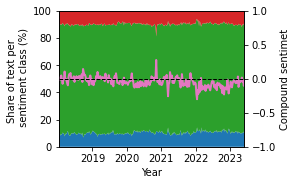

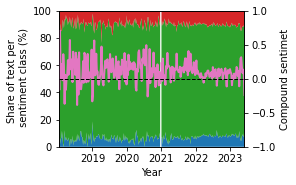

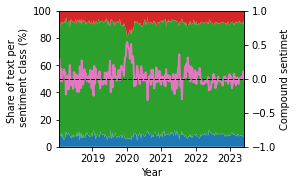

In [37]:
plot_sentiments_stacked_area(df, 'topic_energy_security', 'EN')
plot_sentiments_stacked_area(df, 'topic_energy_security', 'DE')
plot_sentiments_stacked_area(df, 'topic_energy_security', 'FR')


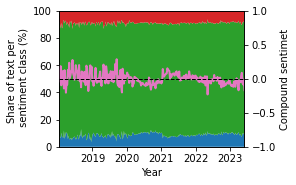

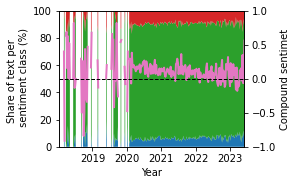

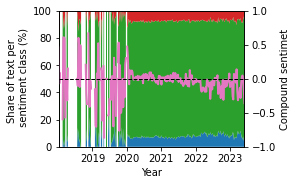

In [38]:
plot_sentiments_stacked_area(df, 'topic_covid_19', 'EN')
plot_sentiments_stacked_area(df, 'topic_covid_19', 'DE')
plot_sentiments_stacked_area(df, 'topic_covid_19', 'FR')

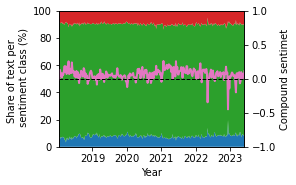

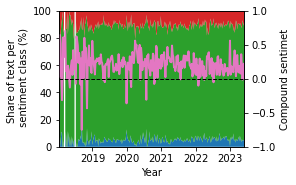

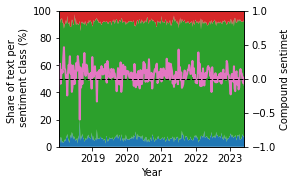

In [39]:
plot_sentiments_stacked_area(df, 'topic_climate_change', 'EN')
plot_sentiments_stacked_area(df, 'topic_climate_change', 'DE')
plot_sentiments_stacked_area(df, 'topic_climate_change', 'FR')

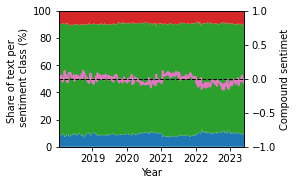

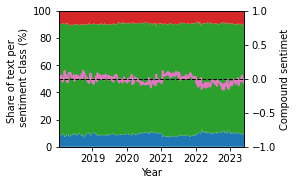

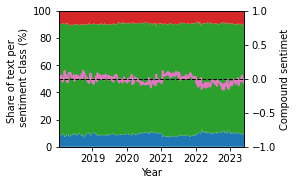

In [40]:
plot_sentiments_stacked_area(df, 'topic_climate_change')
plot_sentiments_stacked_area(df, 'topic_covid_19')
plot_sentiments_stacked_area(df, 'topic_energy_security')

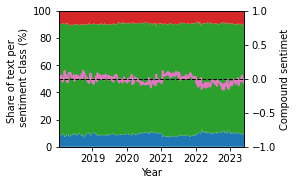

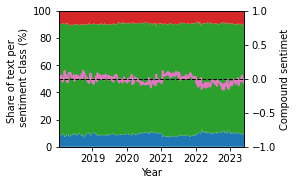

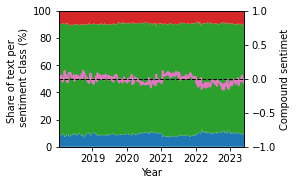

In [41]:
plot_sentiments_stacked_area(df, language='EN')
plot_sentiments_stacked_area(df, language='DE')
plot_sentiments_stacked_area(df, language='FR')

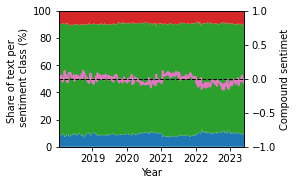

In [42]:
plot_sentiments_stacked_area(df)


In [43]:
def plot_sentiments_stacked_area_v2(df, topic):
    
    
    df_tmp = df[df[topic]]
    

    g= df_tmp.groupby(pd.Grouper(key='dt',freq='W'))
    df_tmp_mean= g.mean()

    y = np.row_stack((df_tmp_mean.sentimentNegative,  df_tmp_mean.sentimentNeutral, df_tmp_mean.sentimentPositive,))
    x = df_tmp_mean.index

    # Make new array consisting of fractions of column-totals,
    # using .astype(float) to avoid integer division
    percent = y /  y.sum(axis=0).astype(float) * 100 

    fig = plt.figure(figsize=(3.33, 2.5))
    ax = fig.add_subplot(111)


    ax2 = ax.twinx()
    lines2 = ax2.plot(df_tmp_mean.index, df_tmp_mean.sentimentCompound, label='compound', color='tab:pink', lw=2)
    ax2.plot(df_tmp_mean.index, [0] * 283, color='black', linestyle='dashed', lw=1)
    ax2.set_ylim([-1, 1])
    ax2.set_ylabel('Compound sentimet', fontsize = 10)

    lines1 = ax.stackplot(x, percent, colors=['tab:blue', 'tab:green', 'tab:red'], labels=['negative', 'neutral','positive'])
    ax.set_ylabel('Share of text per \n sentiment class (%)', fontsize = 10)
    ax.margins(0, 0) # Set margins to avoid "whitespace"

    

    lns = lines1+lines2
    labs = [l.get_label() for l in lns]
    #ax.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, 1.25), fancybox=True, shadow=True, ncol=4, prop={'size': 8})

    ax.set_xlabel('Year', fontsize = 10)
    

    #plt.axhline(0, color='black', linestyle='dashed')

    ax.tick_params(axis='both', which='major', labelsize=10)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    #ax.tick_params(axis='x', which='major', rotation=45)
    #ax.tick_params(axis='x', which='minor', rotation=45)
    plt.savefig('./plots/sentiments'+'_'+topic+'.pdf', bbox_inches = 'tight')
    
    plt.show()

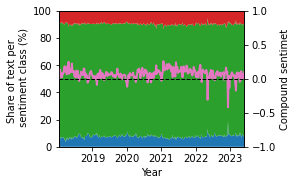

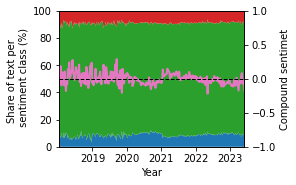

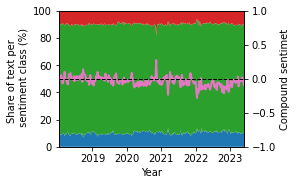

In [44]:
plot_sentiments_stacked_area_v2(df, 'topic_climate_change')
plot_sentiments_stacked_area_v2(df, 'topic_covid_19')
plot_sentiments_stacked_area_v2(df, 'topic_energy_security')